In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [27]:
# Load the dataset 
data = pd.read_csv('Dataset .csv')
data.head(3)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [40]:
# Extract relevant columns
cuisine_ratings = data[['Cuisines', 'Aggregate rating']]
cuisine_ratings


,Cuisines,Aggregate rating
0,"French, Japanese, Desserts",4.8
1,Japanese,4.5
2,"Seafood, Asian, Filipino, Indian",4.4
3,"Japanese, Sushi",4.9
4,"Japanese, Korean",4.8
...,...,...
9546,Turkish,4.1
9547,"World Cuisine, Patisserie, Cafe",4.2
9548,"Italian, World Cuisine",3.7
9549,Restaurant Cafe,4.0


In [41]:
# Group by cuisine and calculate average rating
cuisine_avg_ratings = cuisine_ratings.groupby('Cuisines')['Aggregate rating'].mean()
cuisine_avg_ratings


Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1825, dtype: float64

In [42]:
# Sort by average rating
cuisine_avg_ratings = cuisine_avg_ratings.sort_values(ascending=False)

cuisine_avg_ratings

Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64

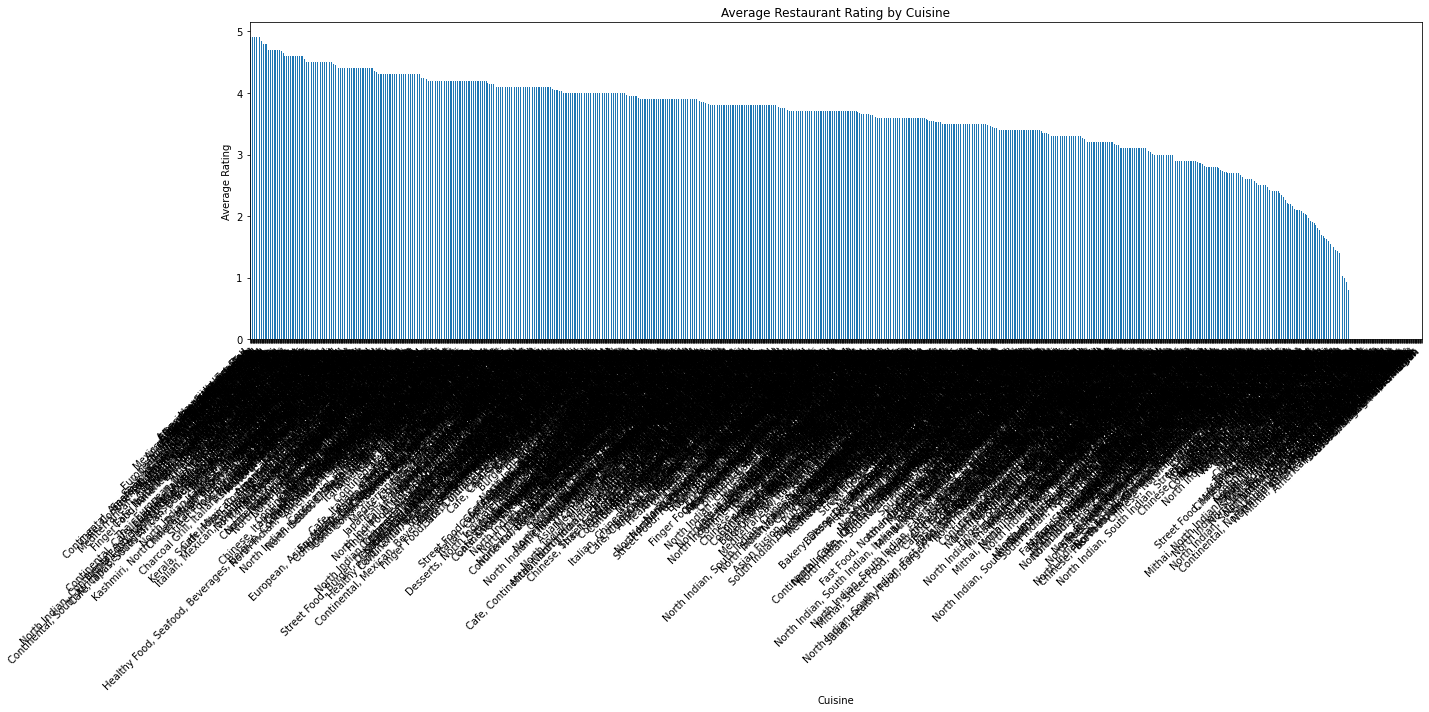

In [31]:
# Create a bar plot
plt.figure(figsize=(20, 10))
cuisine_avg_ratings.plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Average Restaurant Rating by Cuisine')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
# Extract relevant columns
cuisine_votes = data[['Cuisines', 'Votes']]
cuisine_votes


,Cuisines,Votes
0,"French, Japanese, Desserts",314
1,Japanese,591
2,"Seafood, Asian, Filipino, Indian",270
3,"Japanese, Sushi",365
4,"Japanese, Korean",229
...,...,...
9546,Turkish,788
9547,"World Cuisine, Patisserie, Cafe",1034
9548,"Italian, World Cuisine",661
9549,Restaurant Cafe,901


In [45]:
# Group by cuisine and sum the votes
cuisine_total_votes = cuisine_votes.groupby('Cuisines')['Votes'].sum()
cuisine_total_votes


Cuisines
Afghani                                        39
Afghani, Mughlai, Chinese                       2
Afghani, North Indian                           0
Afghani, North Indian, Pakistani, Arabian       3
African                                       373
                                             ... 
Western, Asian, Cafe                          259
Western, Fusion, Fast Food                     32
World Cuisine                                  95
World Cuisine, Mexican, Italian               115
World Cuisine, Patisserie, Cafe              1034
Name: Votes, Length: 1825, dtype: int64

In [46]:
# Sort by total votes
cuisine_total_votes = cuisine_total_votes.sort_values(ascending=False)

cuisine_total_votes

Cuisines
North Indian, Mughlai                                               53747
North Indian                                                        46241
North Indian, Chinese                                               42012
Cafe                                                                30657
Chinese                                                             21925
                                                                    ...  
Mithai, North Indian, South Indian, Chinese, Street Food, Bakery        0
Cafe, Tibetan                                                           0
Chinese, Fast Food, Pizza                                               0
Chinese, Italian                                                        0
Seafood, Mughlai, North Indian                                          0
Name: Votes, Length: 1825, dtype: int64

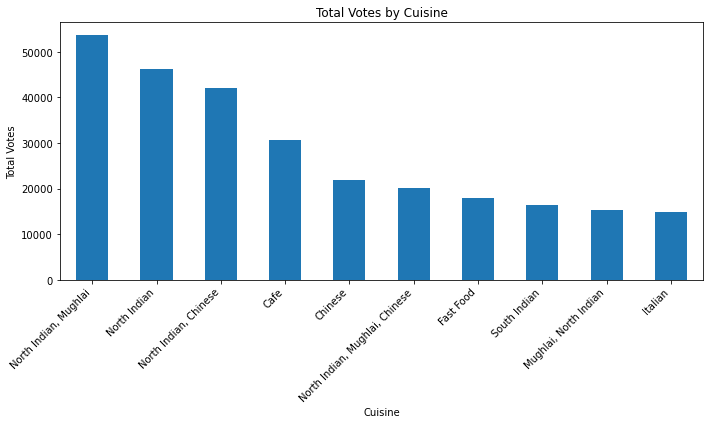

In [47]:
# Create a bar plot
plt.figure(figsize=(10, 6))
cuisine_total_votes.head(10).plot(kind='bar')  # Show top 10 cuisines
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.title('Total Votes by Cuisine')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()